In [2]:
import random
import time
import collections
import matplotlib.pyplot as plt



### Задача 0


In [1]:

def delete_elements_from_array(array, element):
    """
        This function deletes all elements that equal to element from array. 
        
        :param array: Input array
        :type array: list
        :param element: Element that must be deleted from array
        :type element: int
        
        :returns: New array without element with the other elements in the same order
        :rtype: list
    """
    replace_position = len(array)

    for i in range(len(array)):
        if array[i] == element and replace_position == len(array):
            replace_position = i

        elif array[i] != element and replace_position != len(array):
            array[i], array[replace_position] = array[replace_position], array[i]
            replace_position += 1
                        
    return array[:replace_position]
    

In [3]:
N = 100
times = collections.defaultdict(float)

for n in range(3, 18):
    n = 2**n

    for i in range(N):
        a = [0] * (n //3) +[random.randint(1, 5) for _ in range(n - n//3)]
        random.shuffle(a)
        start = time.time()
        delete_elements_from_array(a, 0)
        end = time.time()
        times[n] += end-start
    times[n] /= N

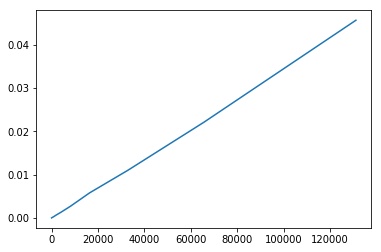

In [4]:
x = [i[0] for i in times.items()]
y = [i[1] for i in times.items()]
plt.plot(x, y)

Как и хотели, линейная зависимость

### Задача 1

In [14]:
def min_complex_number(n1, n2, n3):
    def abs_complex(x):
        return abs(x)
    
    abs_1, abs_2, abs_3 = abs_complex(n1), abs_complex(n2), abs_complex(n3)
    
    if abs_1 < abs_2 and abs_1 < abs_3:
        return n1
    elif abs_2 < abs_3:
        return n2
    else:
        return n3

In [6]:
n1 = 3 + 4j
n2 = 3 + 2j
n3 = 3 + 1j

min_complex_number(n1, n2, n3)

(3+1j)

### Задача 2

In [7]:
from itertools import product
import numpy as np 

In [8]:
class DtypeException(Exception):
    def __init__(self, message):
        pass
        
class FormatException(Exception):
    def __init__(self, message):
        pass

In [9]:
from functools import lru_cache
from itertools import permutations

class ATM:
    def __init__(self):
        pass
    
    @lru_cache(maxsize=64)
    def fib(self, n):
        n = int(n)
        a = 0
        b = 1
        for __ in range(n):
            a, b = b, a + b
        return str(a)
    
    @lru_cache(maxsize=64)
    def gcd(self, a, b):
        while a != 0 and b != 0:
            if a > b:
                a %= b
            else:
                b %= a
        return a + b
    
    def array2int(self, array):
        return int(''.join(array))

    def divide_number(self, x, n_parts = 4):      
        step = len(x) // n_parts
        parts = [x[step*i:step*(i+1)] for i in range(n_parts)]
        parts = sorted(parts)

        if len(parts)*step != len(x):
            raise FormatException('Incorrect card number')
        
        return parts
    
    def median(self, array):
        return np.median(array)
    
    def return_mediana(self, card_number, password):
        """
            Parameters
            --------
            card_number: int in range
                card_number should consists of four parts of equal length
            password: int
            
            Returns
            --------
            m: int
                Median of greatest common divisor and password 
                between all permutations
        """
        
        if not isinstance(card_number, int) or card_number < 0:
            raise DtypeException('card_number must be positive integer')
            
        if not isinstance(password, int) or password < 0:
            raise DtypeException('Password must be positive integer')
        
        card_number = str(card_number)
        
        four_numbers = self.divide_number(card_number)
        fibonacci = [self.fib(x) for x in four_numbers]
        gcds = []
        
        for value in permutations(fibonacci):
            value = self.array2int(value)
            gcd_number = self.gcd(value, password)
            gcds.append(gcd_number)
            
        return self.median(gcds)
 
        

In [10]:
card1 = 349
card2 = 12345678
card3 = 9999999899979996

In [11]:
atm = ATM()

In [12]:
%time atm.return_mediana(card3, 3)

CPU times: user 26.1 ms, sys: 1.36 ms, total: 27.5 ms
Wall time: 26.7 ms


1.0

In [13]:
%time atm.return_mediana(card3, 3)

CPU times: user 14.7 ms, sys: 843 µs, total: 15.6 ms
Wall time: 15.2 ms


1.0

Время уменьшилось, так как данные кешировались.

In [15]:
%time atm.return_mediana(card2, 3)

CPU times: user 606 µs, sys: 181 µs, total: 787 µs
Wall time: 716 µs


3.0

### Задача 3

Рассмотрим скорость работы при вставке и удалении элементов справа и слева для **list** и **deque**

In [16]:
from collections import deque


СКОРОСТЬ

In [17]:
s = list(range(1000))
d = deque(s)

s_rappend, s_rpop = s.append, s.pop
d_rappend, d_rpop = d.append, d.pop

s_lappend, s_lpop = s.insert, s.pop
d_lappend, d_lpop = d.appendleft, d.popleft

s_mappend, s_mpop = s.insert, s.pop
d_mappend, d_mpop = d.insert, d.pop

print('append/pop right')
%timeit s_rpop(); s_rappend(None) # list right performance
%timeit d_rpop(); d_rappend(None) # deque right performance
print()
print('append/pop left')
%timeit s_lpop(); s_lappend(0, None) # list left performance
%timeit d_lpop(); d_lappend(None) # deque left performance
print()
print('append/pop middle')
%timeit s_mpop(); s_mappend(500, None) # list middle performance
%timeit d_mpop(); d_mappend(500, None) # deque middle performance



append/pop right
112 ns ± 5.7 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
83.4 ns ± 0.769 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)

append/pop left
641 ns ± 14.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
92 ns ± 1.79 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)

append/pop middle
426 ns ± 23.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
911 ns ± 11.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


**deque** работает быстрее, чем **list** как для добавления элемента справа, так и слева. 

В **list** вставка элемента в конец или удаление элемента с конца имеет сложность O(1).

При добавлении или удалении элемента из **list**, все последующие элементы придется передвинуть, поэтому в худшем случае мы передвинем n эллементов. И сложность добавления элемента в начало станет O(n).

**deque** - это структура, объединяющая стек и очередь, которая поддерживает операции добавления в конец и в начало (элементы не передвигаются). Поэтому при добавлении или удалении элемента из начала массива сложность останется O(1). Но у **deque** плохая производительность, O(n), при добавлении элементов в середину массива.

ПАМЯТЬ

Напишем функцию, которая показывает как хранится объект в памяти если мы добавляем объекты справа. 
         

In [18]:
from sys import getsizeof
def function_rappend():
    print('deque')
    N = int(0)    
    x_deq = deque([0] * N)
    x_li = list([0] * N)
    for i in range(130):
        print('{}: list size: {}, deque size: {}'.format(
            i, getsizeof(x_li), getsizeof(x_deq)))
        x_li.append(1)
        x_deq.append(1)
        

In [19]:
function_rappend()

deque
0: list size: 64, deque size: 632
1: list size: 96, deque size: 632
2: list size: 96, deque size: 632
3: list size: 96, deque size: 632
4: list size: 96, deque size: 632
5: list size: 128, deque size: 632
6: list size: 128, deque size: 632
7: list size: 128, deque size: 632
8: list size: 128, deque size: 632
9: list size: 192, deque size: 632
10: list size: 192, deque size: 632
11: list size: 192, deque size: 632
12: list size: 192, deque size: 632
13: list size: 192, deque size: 632
14: list size: 192, deque size: 632
15: list size: 192, deque size: 632
16: list size: 192, deque size: 632
17: list size: 264, deque size: 632
18: list size: 264, deque size: 632
19: list size: 264, deque size: 632
20: list size: 264, deque size: 632
21: list size: 264, deque size: 632
22: list size: 264, deque size: 632
23: list size: 264, deque size: 632
24: list size: 264, deque size: 632
25: list size: 264, deque size: 632
26: list size: 344, deque size: 632
27: list size: 344, deque size: 632
2

Для списков новая память выделяется пропорционально размеру списка. Например, для пустого списка выделяется одна ячейка. Если к пустому списку добавляется элемент, то резервируется сразу 4 ячейки памяти. Если список имеет длину 5, и добавляется еще один эллемент, то резервируется еще 4 ячейки памяти и далее по следующей схеме: [https://stackoverflow.com/questions/7247298/size-of-list-in-memory].

Для дека каждый раз резервируется новые 64 ячейки памяти. 



Далее посмотрим, что происходит, если мы добавляем в начало и в конец списка идека элемент.

In [22]:
def function_lrappend():
    N = int(0)    
    x_deq = deque()
    x_li = list([])
    for i in range(130):
        x_li.append(0)
        x_deq.append(0)
        print('{} end: list size: {}, deque size: {}'.format(
            i, getsizeof(x_li), getsizeof(x_deq)))
            
        x_li.insert(0, 1)
        x_deq.appendleft(1)
        
        print('{} start: list size: {}, deque size: {}'.format(
            i, getsizeof(x_li), getsizeof(x_deq)))

In [23]:
function_lrappend()

0 end: list size: 96, deque size: 632
0 start: list size: 96, deque size: 632
1 end: list size: 96, deque size: 632
1 start: list size: 96, deque size: 632
2 end: list size: 128, deque size: 632
2 start: list size: 128, deque size: 632
3 end: list size: 128, deque size: 632
3 start: list size: 128, deque size: 632
4 end: list size: 192, deque size: 632
4 start: list size: 192, deque size: 632
5 end: list size: 192, deque size: 632
5 start: list size: 192, deque size: 632
6 end: list size: 192, deque size: 632
6 start: list size: 192, deque size: 632
7 end: list size: 192, deque size: 632
7 start: list size: 192, deque size: 632
8 end: list size: 264, deque size: 632
8 start: list size: 264, deque size: 632
9 end: list size: 264, deque size: 632
9 start: list size: 264, deque size: 632
10 end: list size: 264, deque size: 632
10 start: list size: 264, deque size: 632
11 end: list size: 264, deque size: 632
11 start: list size: 264, deque size: 632
12 end: list size: 264, deque size: 632


Для списков при добавлении элемента в начало, все последующие элементы сдвигаются на 1 вперед и, если памяти не хватает, то выделяется еще память и логика остается прежней. 

Для дека новое резервирование памяти происходит также как и раньше. При создании нового блока хранится еще ссылка на связанный с ним блок, что увеличивает расход памяти. 

Вывод. Деки лучше использовать, когда нужно извлекать элементы из начала или конца. Для извлечения элементов посередине они не эффективны, так как нужно искать, как связаны блоки другс другом (лучше использовать list).  